In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# my module
current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, '../'))
import calc_BVI

In [2]:
input_folderpath = r"C:\Users\02217013\Documents"
input_filename = "calliance1_nmr.csv"


input_file = os.path.join(input_folderpath, input_filename)
the_df = pd.read_csv(input_file)

the_Pci = 50

Poreの測定値のBVIと、xをいろいろ変更してみた時のSpectral BVIの理論値をプロット。
交点におけるxがそのサンプルの適切なx。各グラフに適切なcおよびxを入力した。

C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi"] = T2i / df.T2.copy() * (2 - T2i / df.T2.copy())
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi_dx"] = 2 / (df.T2 * Pci) - 2 * x / (df.T2 * df.T2 * Pci * Pci)
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

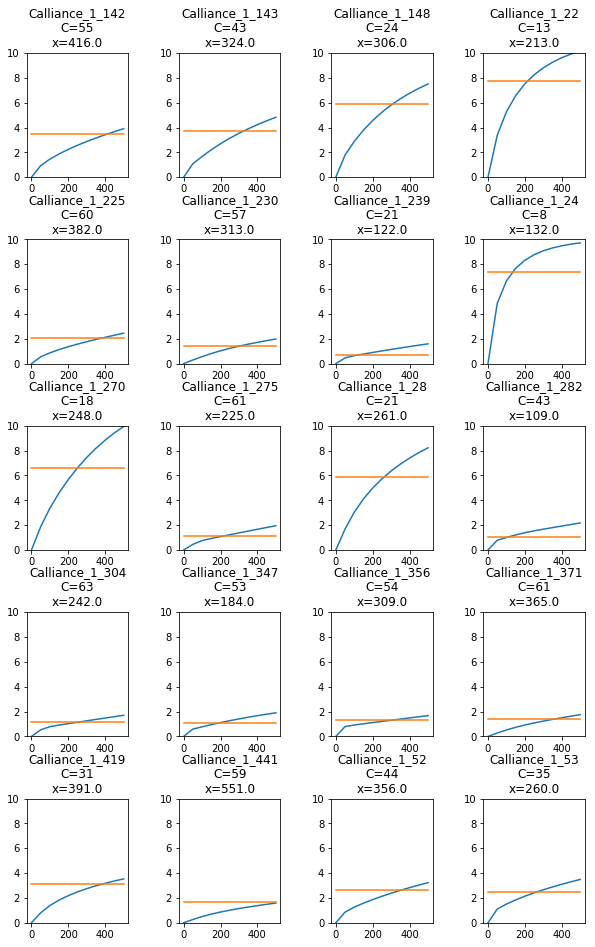

In [3]:
graph_bins = 11
x = np.linspace(0, 500, graph_bins)

plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, (key, group) in enumerate(the_df.groupby("ID")):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)

    # plot BVI corresponding x
    BVI_list = [calc_BVI.BVI_spectral(xi, group, the_Pci)[0] for xi in x]
    plt.subplot(5, 4, i+1)
    plt.title("{0}\nC={1}\nx={2}".format(
            key, round(the_t2_cutoff), round(optimized_x)))
    plt.plot(x, BVI_list)
    plt.plot(x, np.ones(graph_bins)*group.BVI_Por_cum.iloc[-1])
    plt.ylim(0, 10)

plt.show()

### x vs c　散布図
相関はない。

C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi"] = T2i / df.T2.copy() * (2 - T2i / df.T2.copy())
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["Swi_dx"] = 2 / (df.T2 * Pci) - 2 * x / (df.T2 * df.T2 * Pci * Pci)
C:\Users\02217013\Documents\GitHub\PPRT\src\Analyze\..\calc_BVI.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

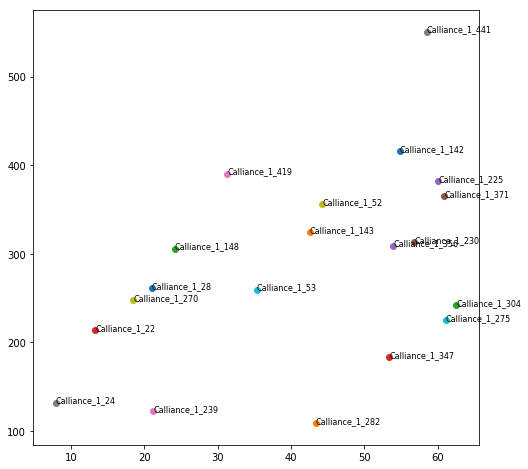

In [4]:
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)

for key, group in the_df.groupby("ID"):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)
    
    ID = group["ID"].iloc[0]
    ax1.scatter(the_t2_cutoff, optimized_x)
    ax1.annotate(ID, (the_t2_cutoff, optimized_x), size=8)    

plt.show()

x, cの平均値を使ったときの、それぞれのtrue BVI vs estimated BVI

41.24835758328399 285.4382674490214


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


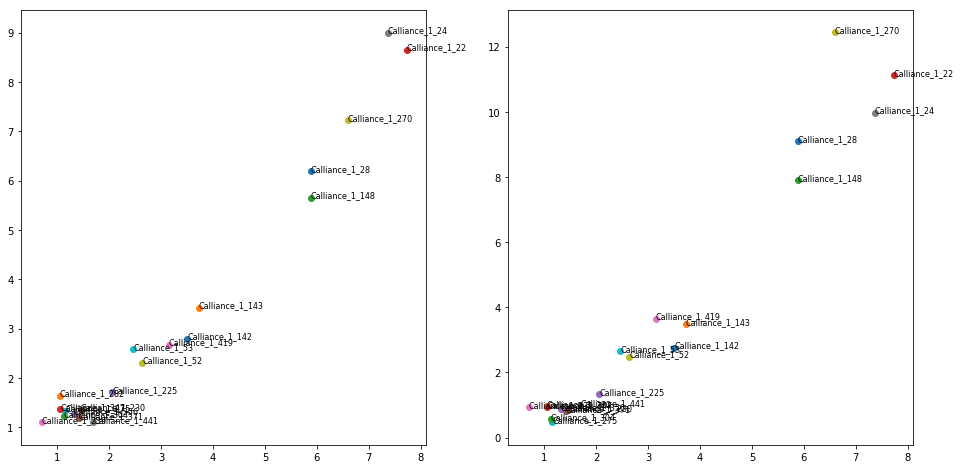

In [9]:
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# calc averaged C and averaged X
t2_cutoff_list = []
optimized_x_list = []

for i, (key, group) in enumerate(the_df.groupby("ID")):

    # calc_T2_cutoff
    the_t2_cutoff = calc_BVI.calc_cutoff_C(group)
    t2_cutoff_list.append(the_t2_cutoff)

    # calc best x using newton method
    optimized_x = calc_BVI.X_spectral_theoretical(1000, group, the_Pci)
    optimized_x_list.append(optimized_x)

averaged_c = np.mean(np.array(t2_cutoff_list))
averaged_x = np.mean(np.array(optimized_x_list))

print(averaged_c, averaged_x)

# calc permeaility from averaged c and x and plot
for key, group in the_df.groupby("ID"):
    spectral_BVI, BVI_dx = calc_BVI.BVI_spectral(averaged_x, group, the_Pci)
    cutoff_BVI = calc_BVI.BVI_cutoff(group, averaged_c)
    core_BVI = group.BVI_Por_cum.iloc[-1]

    
    # core BVI vs spectral BVI
    ax1.scatter(core_BVI, spectral_BVI)
    ax1.annotate(key, (core_BVI, spectral_BVI), size=8)
    
    ax2.scatter(core_BVI, cutoff_BVI)
    ax2.annotate(key, (core_BVI, cutoff_BVI), size=8)

plt.show()